In [46]:
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import statistics
import math
import matplotlib.image as image
from PIL import Image
import matplotlib.animation

%matplotlib notebook

In [ ]:
dire = int(input("Enter the directory of the data: "))
file = int(input("Enter the name of the file: "))
csvdire=r'~/Documents/untitled folder/Documents/SimData/train/{}/SimpleTest/{}.csv'.format(dire, file)
df = pd.read_csv(csvdire, sep=',')



In [ ]:
df

,X,Y,Pressure,TiltX,TiltY,Time
0,679.023443815683,568.591292,0.190661,3183.0,-1164.0,00:01.4930520
1,678.022866381799,568.959926,0.202380,3183.0,-1164.0,00:01.5087517
2,677.022288947915,569.117912,0.315908,3183.0,-1164.0,00:01.5244452
3,676.285021365054,568.538630,0.464836,3183.0,-1164.0,00:01.5399147
4,675.705739692805,565.852870,0.487297,3183.0,-1164.0,00:01.5580646
...,...,...,...,...,...,...
142,654.693613581245,580.598222,0.666499,2612.0,-1334.0,00:03.0225483
143,654.904261462063,580.282250,0.622065,2612.0,-1334.0,00:03.0225483
144,656.800092389421,578.913038,0.379873,2612.0,-1334.0,00:03.0225483
145,Time Elapsed till drawing started: 00:01.4930520,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          147 non-null    object 
 1    Y         145 non-null    float64
 2    Pressure  145 non-null    float64
 3    TiltX     145 non-null    float64
 4    TiltY     145 non-null    float64
 5    Time      145 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.0+ KB


In [ ]:

timestamps = df.iloc[-2:]
df = df.iloc[:-2]

df

,X,Y,Pressure,TiltX,TiltY,Time
0,679.023443815683,568.591292,0.190661,3183.0,-1164.0,00:01.4930520
1,678.022866381799,568.959926,0.202380,3183.0,-1164.0,00:01.5087517
2,677.022288947915,569.117912,0.315908,3183.0,-1164.0,00:01.5244452
3,676.285021365054,568.538630,0.464836,3183.0,-1164.0,00:01.5399147
4,675.705739692805,565.852870,0.487297,3183.0,-1164.0,00:01.5580646
...,...,...,...,...,...,...
140,654.535627670632,581.124841,0.779538,2612.0,-1334.0,00:03.0068742
141,654.535627670632,581.124841,0.754147,2612.0,-1334.0,00:03.0068742
142,654.693613581245,580.598222,0.666499,2612.0,-1334.0,00:03.0225483
143,654.904261462063,580.282250,0.622065,2612.0,-1334.0,00:03.0225483


In [ ]:
df['X'] = df['X'].astype('float64')
df.info

/var/folders/wt/gc_1lq2x661cfc5j2m1s0hdc0000gn/T/ipykernel_66061/1950283974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X'] = df['X'].astype('float64')


<bound method DataFrame.info of               X           Y   Pressure   TiltX   TiltY           Time
0    679.023444  568.591292   0.190661  3183.0 -1164.0  00:01.4930520
1    678.022866  568.959926   0.202380  3183.0 -1164.0  00:01.5087517
2    677.022289  569.117912   0.315908  3183.0 -1164.0  00:01.5244452
3    676.285021  568.538630   0.464836  3183.0 -1164.0  00:01.5399147
4    675.705740  565.852870   0.487297  3183.0 -1164.0  00:01.5580646
..          ...         ...        ...     ...     ...            ...
140  654.535628  581.124841   0.779538  2612.0 -1334.0  00:03.0068742
141  654.535628  581.124841   0.754147  2612.0 -1334.0  00:03.0068742
142  654.693614  580.598222   0.666499  2612.0 -1334.0  00:03.0225483
143  654.904261  580.282250   0.622065  2612.0 -1334.0  00:03.0225483
144  656.800092  578.913038   0.379873  2612.0 -1334.0  00:03.0225483

[145 rows x 6 columns]>

[ WARN:0@55.869] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('~/Documents/untitled folder/Documents/SimData/train/7557/SimpleTest/7.png'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

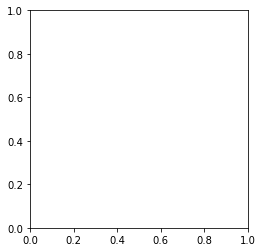

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
from operator import index
import math

main = r'~/Documents/untitled folder/Documents/SimData/train/7557/SimpleTest/7.png'
shape_1 = cv2.imread(main,0)
plt.imshow(shape_1 ,cmap = 'gist_gray')
plt.title('Shape #1')
print(shape_1.shape)
plt.show()